### VGG-19


This code is a reference for future implementations of VGG-19 pre-trained, I´m not find performance model, But focus is of the architecture for implement a tranfer-learning solution. 


<br>
<hr>

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
import glob
import time 
from PIL import Image
from scipy import ndimage, misc
import cv2 

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")



import tensorflow as tf
from tensorflow import keras 
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalMaxPool2D, Dropout 
from tensorflow.keras.models import Model
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from sklearn.metrics import classification_report

In [2]:
# seed 
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

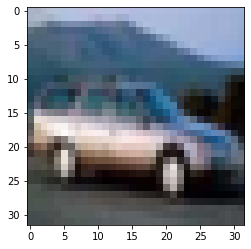

In [5]:
teste = array_to_img(X_train[4])
plt.imshow(teste)

In [6]:
image =  array_to_img(X_train[0])
image.size

(32, 32)

In [7]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

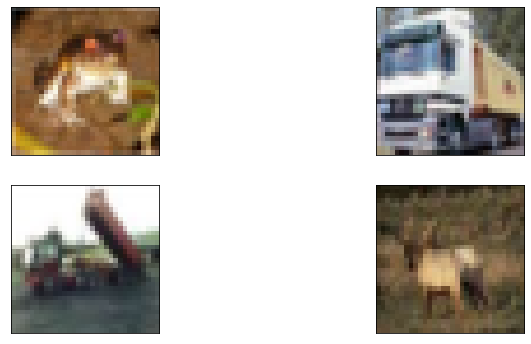

In [8]:
plt.figure(figsize=(12,6))

for image in range(0,4):
  plt.subplot(2,2, image + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[image])
plt.show()

In [9]:
# scaling pixels 
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
# vector for binary matrix 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<hr>
<br>



#### VGG-19




<br>

In [12]:
# VGG-19 architecture
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(32, 32, 3), pooling='max', classes=10)

In [13]:
# setting trainable layers in VGG-19 

for layer in vgg.layers[0:15]:
  layer.trainable = True

for layer in vgg.layers[15:]:
  layer.trainable = False 

In [14]:
# Summary VGG-19
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [15]:
# Build CNN 

model = Sequential()
model.add(vgg)
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.30))
model.add(Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 250)               128250    
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
Total params: 20,155,144
Trainable params: 8,356,104
Non-trainable params: 11,799,040
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(0.001),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

In [18]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 24s 62ms/step - loss: 1.8580 - accuracy: 0.2726 - val_loss: 1.5107 - val_accuracy: 0.3953
Epoch 2/10
391/391 [==============================] - 24s 61ms/step - loss: 1.2941 - accuracy: 0.5189 - val_loss: 1.0267 - val_accuracy: 0.6333
Epoch 3/10
391/391 [==============================] - 23s 60ms/step - loss: 0.9487 - accuracy: 0.6640 - val_loss: 0.8793 - val_accuracy: 0.6984
Epoch 4/10
391/391 [==============================] - 23s 59ms/step - loss: 0.7476 - accuracy: 0.7431 - val_loss: 0.8493 - val_accuracy: 0.7265
Epoch 5/10
391/391 [==============================] - 23s 60ms/step - loss: 0.6072 - accuracy: 0.7973 - val_loss: 0.7170 - val_accuracy: 0.7612
Epoch 6/10
391/391 [==============================] - 23s 60ms/step - loss: 0.5144 - accuracy: 0.8289 - val_loss: 0.7005 - val_accuracy: 0.7698
Epoch 7/10
391/391 [==============================] - 23s 60ms/step - loss: 0.4314 - accuracy: 0.8567 - val_loss: 0.6390 - val_accuracy:

<br>
<hr>